# Health Insurance Cost Estimation Using Linear Regression
## By MiMoTrixZ

### Import Libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
from sklearn.model_selection import cross_val_score, KFold
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error

# A

### Load Data and See the Shape

In [86]:
df = pd.read_csv("insurance.csv")
print(df.shape)
df.info()

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### Map Categorical Data to Numerical Ones

In [148]:
catColumns = ['sex', 'smoker', 'region']
insurance_dum = pd.get_dummies(df, columns = catColumns, drop_first=True)
insurance_dum.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# B

### Correlation Plot

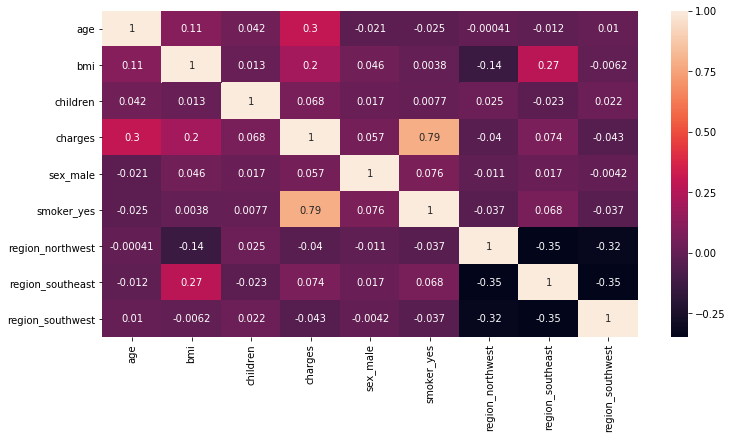

In [147]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(insurance_dum.corr(), annot=True)

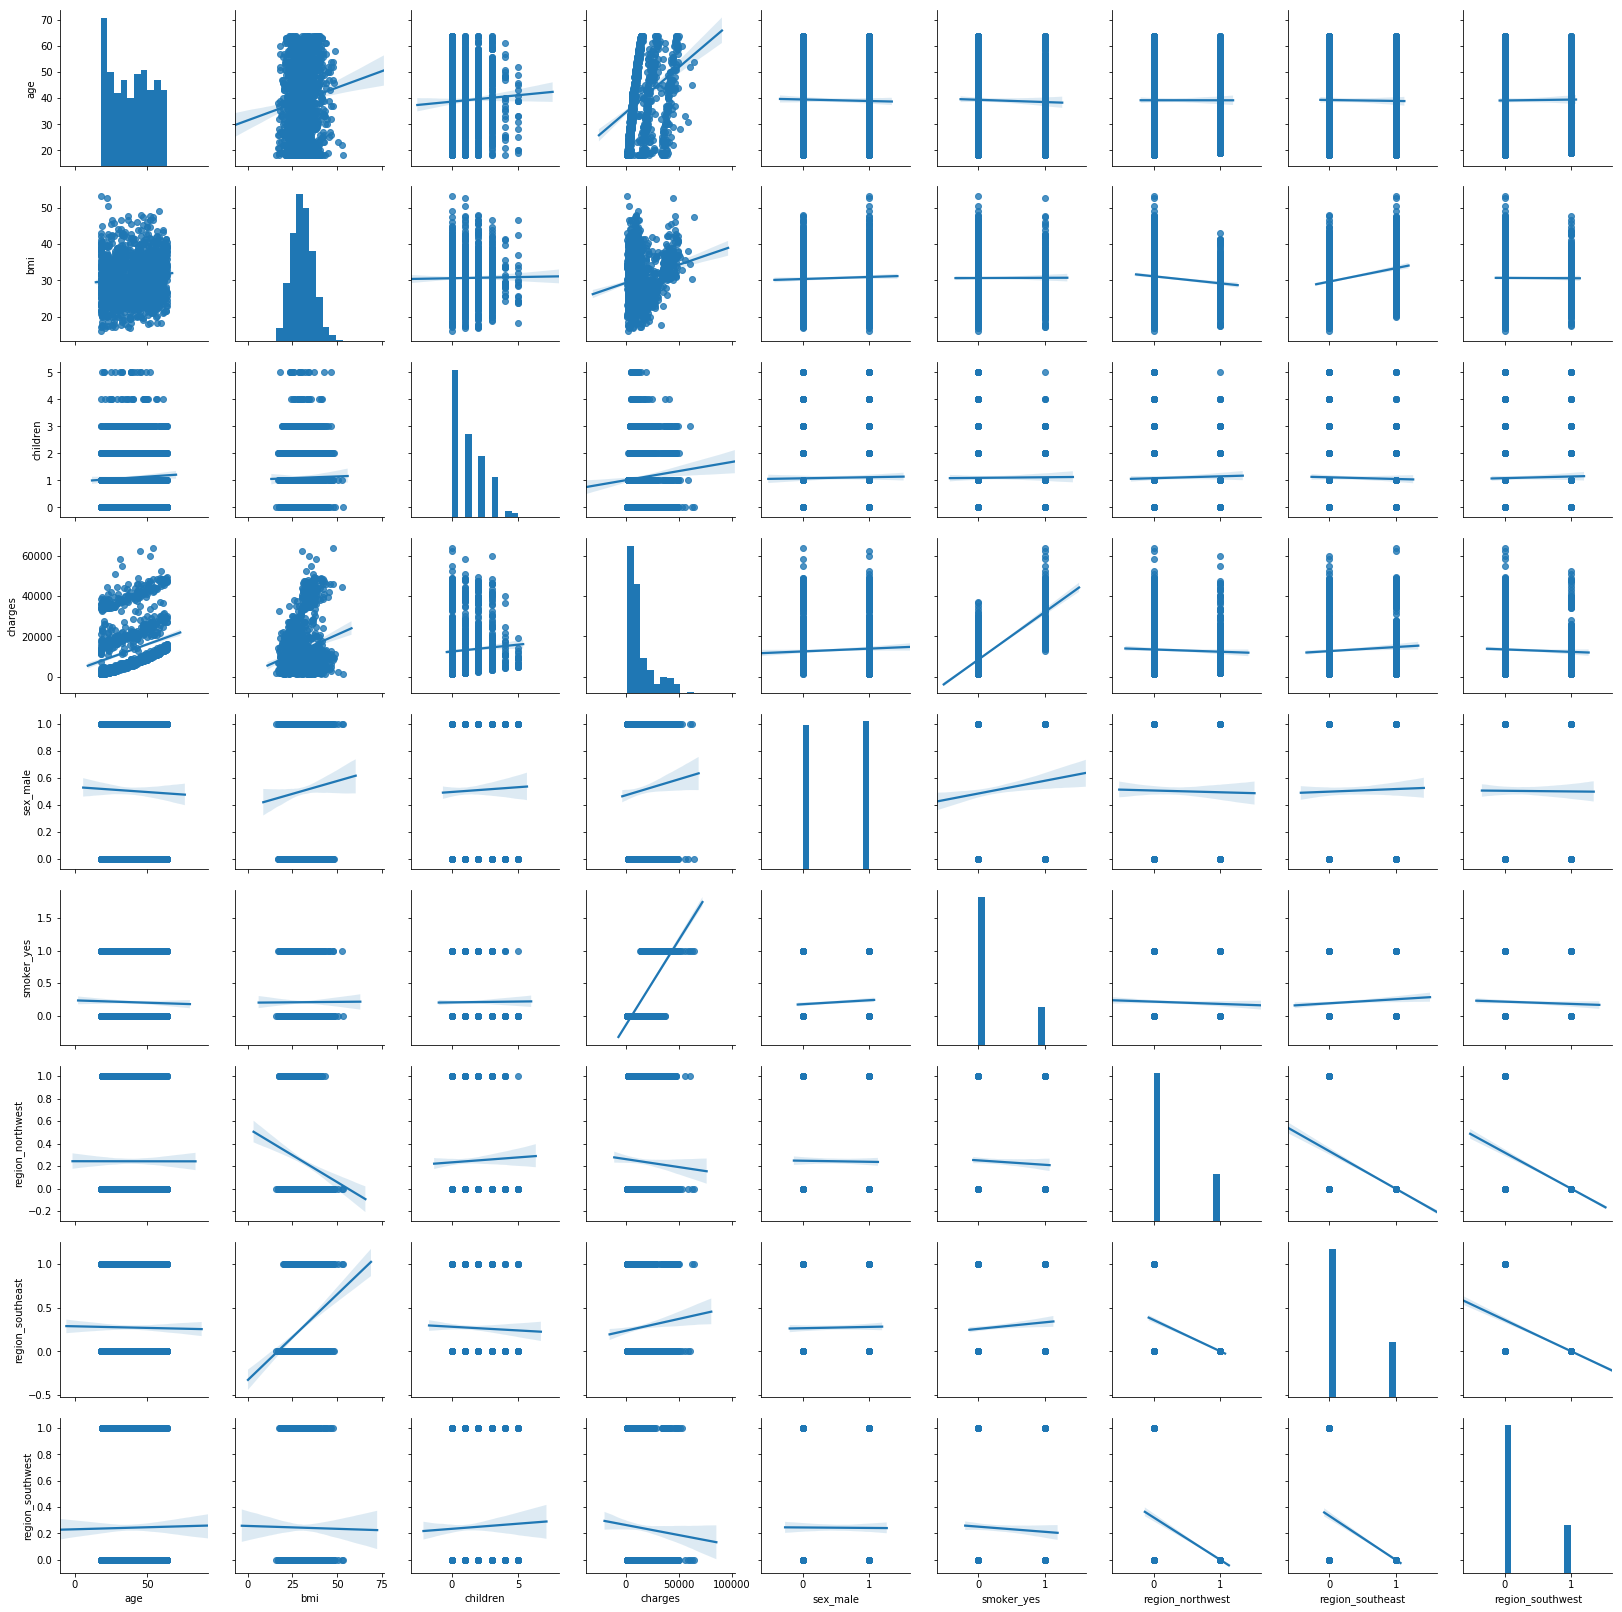

In [149]:
sns.pairplot(insurance_dum, kind='reg')

# C

### Costs Distributions Due to Features

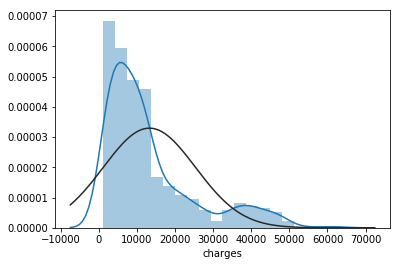

In [91]:
sns.distplot(df["charges"], bins=20, fit=norm)
plt.show()

# D

### Smokers, Non Smokers / Insurance Costs

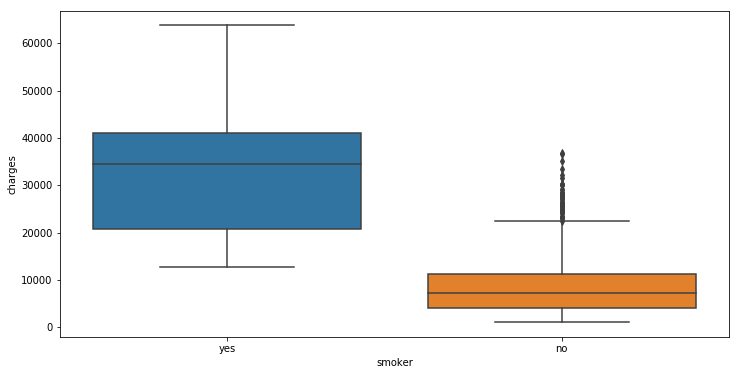

In [92]:
plt.figure(figsize=(12,6))
sns.boxplot(x='smoker', y = 'charges', data = df)

# E
### Females, Males / Smokers

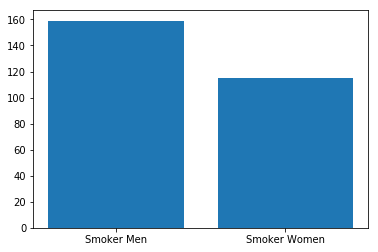

In [93]:
smoker_men = 0
smoker_women = 0
for items in range(len(df)):
    if insurance_dum['sex_male'][items]==0 and insurance_dum['smoker_yes'][items]==1:
        smoker_women = smoker_women + 1
    if insurance_dum['sex_male'][items]==1 and insurance_dum['smoker_yes'][items]==1:
        smoker_men = smoker_men + 1
smokers = ['Smoker Males','Smoker Females']
y = [smoker_men, smoker_women]
x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, y)
plt.xticks(x, ('Smoker Men', 'Smoker Women'))
plt.show()

# F
### BMI vs. Charges

In [94]:
df["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

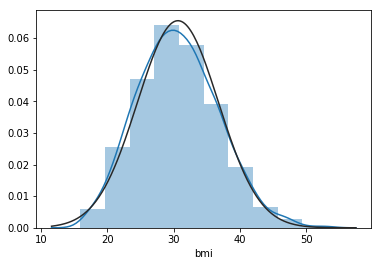

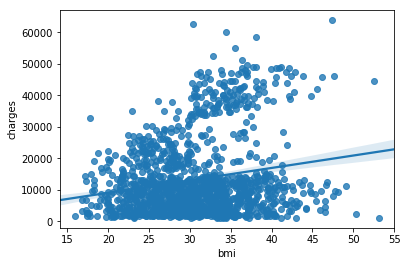

In [95]:
sns.distplot(df["bmi"], bins=10, fit=norm)
plt.show()
sns.regplot(x="bmi", y="charges", data=df);
plt.show()

# E and F
### Creating Model Using K-Fold Cross Validation ( Splitting Data to Train and Test Using SKLearn )

Mean Squared Error When  1 th Fold is Trained:  43807430.46611558


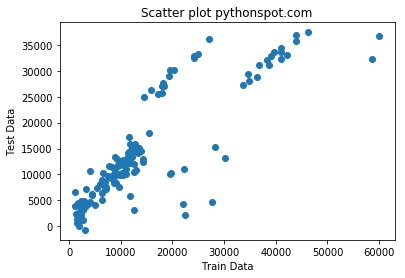

Mean Squared Error When  2 th Fold is Trained:  28819695.679591242


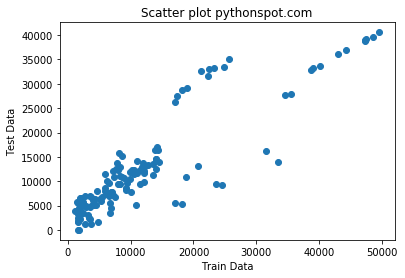

Mean Squared Error When  3 th Fold is Trained:  40130484.27718843


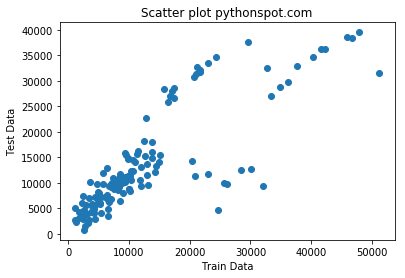

Mean Squared Error When  4 th Fold is Trained:  39222308.91249657


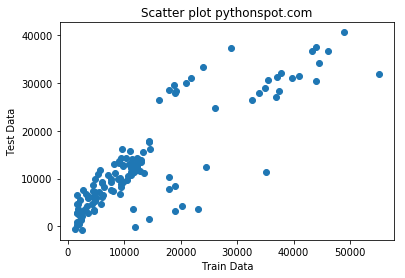

Mean Squared Error When  5 th Fold is Trained:  32262291.40598369


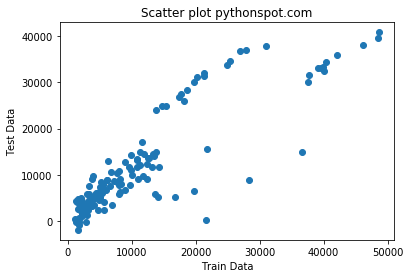

Mean Squared Error When  6 th Fold is Trained:  38861142.89703826


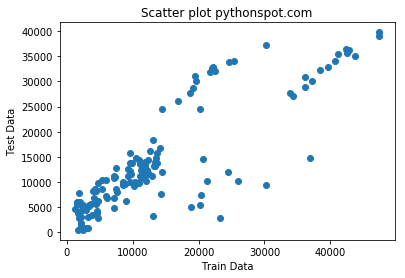

Mean Squared Error When  7 th Fold is Trained:  38549367.555600055


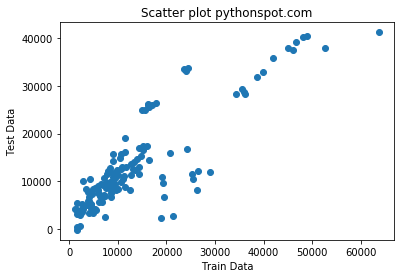

Mean Squared Error When  8 th Fold is Trained:  31015631.637245115


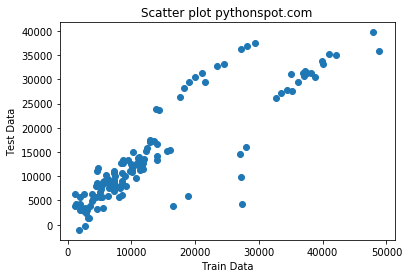

Mean Squared Error When  9 th Fold is Trained:  46408406.030766316


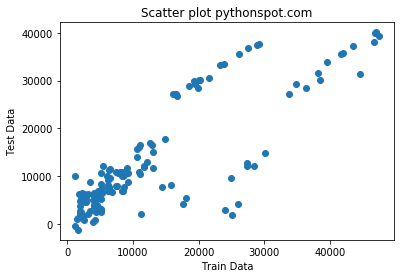

Mean Squared Error When  10 th Fold is Trained:  34036719.61720482


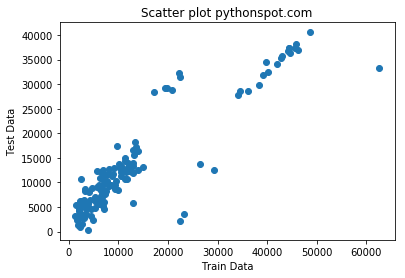

Total Training Error Average:  34036719.61720482
Age Coefficient:  259.5694426874053 
BMI Coefficient:  322.502715139757 
Smoker_Yes Coefficient:  23823.42350100766 
Average Intercept:  -11674.352092391951


In [143]:
cols_not_reg3=['age', 'bmi', 'smoker_yes']

kf=KFold(n_splits=10, random_state=1, shuffle=True)
intercepts=[]
mses=[]
coefs=[]
i = 1
for train_index, test_index in kf.split(insurance_dum[cols_not_reg3]):
    lr=linear_model.LinearRegression()
    lr.fit(insurance_dum[cols_not_reg3].iloc[train_index],
           insurance_dum["charges"].iloc[train_index])
    lr_predictions=lr.predict(insurance_dum[cols_not_reg3].iloc[test_index])
    lr_mse=mean_squared_error(insurance_dum["charges"].iloc[test_index],lr_predictions)
    print("Mean Squared Error When ", i, "th Fold is Trained: ", lr_mse)
    intercepts.append(lr.intercept_)
    coefs.append(lr.coef_)
    mses.append(lr_mse)
    i = i+1
    plt.figure()
    y_pred1 = lr_predictions
    plt.scatter(insurance_dum["charges"].iloc[test_index], y_pred1)
    plt.title('Scatter plot pythonspot.com')
    plt.xlabel('Train Data')
    plt.ylabel('Test Data')
    plt.show()

rmses=[x**.5 for x in mses]
avg_rmse=np.mean(rmses)
print("Total Training Error Average: ", lr_mse)
avg_intercept=np.mean(intercepts)
age_coefs=[]
bmi_coefs=[]
smoking_coefs=[]
for vals in coefs:
    #print vals[0]
    age_coefs.append(vals[0])
    bmi_coefs.append(vals[1])
    smoking_coefs.append(vals[2])
age_coef=np.mean(age_coefs)
bmi_coef=np.mean(bmi_coefs)
smoking_coef=np.mean(smoking_coefs)
print("Age Coefficient: ",age_coef,"\nBMI Coefficient: ",bmi_coef,
      "\nSmoker_Yes Coefficient: ",smoking_coef,"\nAverage Intercept: ",avg_intercept)

### Predictor Function ( Final Output :) )

In [145]:
def calculate_insurance(age,bmi,smoking):
    y=(age_coef*age)+(bmi_coef*bmi)+(smoking_coef*smoking)+avg_intercept
    return y
# For example 19 Year Old Individual with BMI 27.9 Who Smokes
print(calculate_insurance(19,27.9,1))

26078.71657207563
